In [2]:
import ROOT
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Welcome to JupyROOT 6.24/00


In [47]:
def plot(listA, listB, xlabel='', ylabel='', EvsE = True):
    fig = plt.figure(figsize=(7,7))
    plt.scatter(listA, listB, s=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if(EvsE):
        axes = plt.gca()    
        axes.set_xlim([0,350])
        axes.set_ylim([0,350])
        plt.axline((150,150), (400,400))

def color2Dplot(x, y, z, xlabel='', ylabel='', zlabel='', title=''):
    plt.figure(figsize=(10,6))
    points = plt.scatter(x, y, c=z, cmap='jet',lw=0, s=10)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar = plt.colorbar(points)
    cbar.set_label(zlabel)
    
def MakeDataFrame(fileDir, fileName):
    f = uproot.open(fileDir + fileName)
    tree = f[fileName.replace('.root','')]
    df = tree.arrays(library="pd")
    df['Tot1x1_1'] = df['EM1x1_1'] + df['Had1x1_1']
    df['Tot3x3_1'] = df['EM3x3_1'] + df['Had3x3_1']
    df['Tot5x5_1'] = df['EM5x5_1'] + df['Had5x5_1']
    df['Tot7x7_1'] = df['EM7x7_1'] + df['Had7x7_1']
    df['Tot9x9_1'] = df['EM9x9_1'] + df['Had9x9_1']
    df['Tot11x11_1'] = df['EM11x11_1'] + df['Had11x11_1']

    df['Tot1x1_2'] = df['EM1x1_2'] + df['Had1x1_2']
    df['Tot3x3_2'] = df['EM3x3_2'] + df['Had3x3_2']
    df['Tot5x5_2'] = df['EM5x5_2'] + df['Had5x5_2']
    df['Tot7x7_2'] = df['EM7x7_2'] + df['Had7x7_2']
    df['Tot9x9_2'] = df['EM9x9_2'] + df['Had9x9_2']
    df['Tot11x11_2'] = df['EM11x11_2'] + df['Had11x11_2']    

    df['GenFullEnergy_1'] = df['GenEnergy_1']*np.cosh(df['GenEta_1'])
    df['GenFullEnergy_2'] = df['GenEnergy_2']*np.cosh(df['GenEta_2'])
    
    return df

def getEdges(distFromEdge):
    """
    distFromEdge is the number of eta bins to discard from high and low eta edge of the HGC
    """
    EtaCutHigh = (35 - distFromEdge) * 0.087
    EtaCutLow = (15 + distFromEdge) * 0.087
    return(EtaCutLow, EtaCutHigh)

In [54]:
df = MakeDataFrame('varsDir/', 'vars_VBFHToInv_NoPU_WithEnergySplit.root')

In [59]:
for j in range(1,3):
    for i in range(6):
        command = "df_{0}binsfromEdge_{1} = df[(abs(df['GenEta_{1}'])>getEdges({0})[0]) & (abs(df['GenEta_{1}'])<getEdges({0})[1])]".format(i, j)
        print(command)
        exec(command)

df_0binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(0)[0]) & (abs(df['GenEta_1'])<getEdges(0)[1])]
df_1binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(1)[0]) & (abs(df['GenEta_1'])<getEdges(1)[1])]
df_2binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(2)[0]) & (abs(df['GenEta_1'])<getEdges(2)[1])]
df_3binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(3)[0]) & (abs(df['GenEta_1'])<getEdges(3)[1])]
df_4binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(4)[0]) & (abs(df['GenEta_1'])<getEdges(4)[1])]
df_5binsfromEdge_1 = df[(abs(df['GenEta_1'])>getEdges(5)[0]) & (abs(df['GenEta_1'])<getEdges(5)[1])]
df_0binsfromEdge_2 = df[(abs(df['GenEta_2'])>getEdges(0)[0]) & (abs(df['GenEta_2'])<getEdges(0)[1])]
df_1binsfromEdge_2 = df[(abs(df['GenEta_2'])>getEdges(1)[0]) & (abs(df['GenEta_2'])<getEdges(1)[1])]
df_2binsfromEdge_2 = df[(abs(df['GenEta_2'])>getEdges(2)[0]) & (abs(df['GenEta_2'])<getEdges(2)[1])]
df_3binsfromEdge_2 = df[(abs(df['GenEta_2'])>getEdges(3)[0]) & (abs(df['GenEta_2'])<getEdge

Text(0.5, 1.0, 'sa')

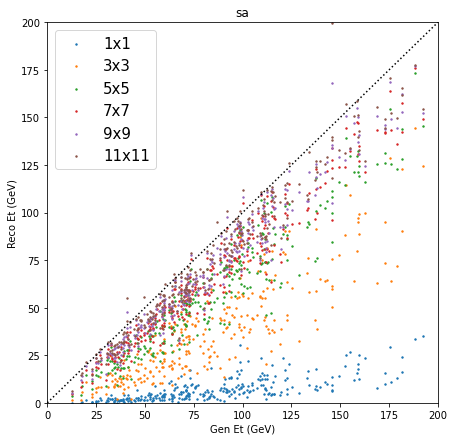

In [77]:
x = df_5binsfromEdge_1['GenEnergy_1']
y1 = df_5binsfromEdge_1['Tot1x1_1']
y3 = df_5binsfromEdge_1['Tot3x3_1']
y5 = df_5binsfromEdge_1['Tot5x5_1']
y7 = df_5binsfromEdge_1['Tot7x7_1']
y9 = df_5binsfromEdge_1['Tot9x9_1']
y11 = df_5binsfromEdge_1['Tot11x11_1']
markersize = 2
alpha=1
fig = plt.figure(figsize=(7,7))
plt.scatter(x, y1, s=markersize, label='1x1', alpha=alpha)
plt.scatter(x, y3, s=markersize, label='3x3', alpha=alpha)
plt.scatter(x, y5, s=markersize, label='5x5', alpha=alpha)
plt.scatter(x, y7, s=markersize, label='7x7', alpha=alpha)
plt.scatter(x, y9, s=markersize, label='9x9', alpha=alpha)
plt.scatter(x, y11, s=markersize, label='11x11', alpha=alpha)
axes = plt.gca() 
axes.set_xlim([0,200])
axes.set_ylim([0,200])
plt.axline((150,150), (550,550), linestyle=":", color='black')
plt.xlabel('Gen Et (GeV)')
plt.ylabel('Reco Et (GeV)')
plt.legend(loc='upper left', fontsize=15)
axes.set_title('Leading Jet ')



In [ ]:
##################Photons##############

In [ ]:
df_photon200 = MakeDataFrame('varsDir/', '.root')